# **MIDTERM**

### Project Outline
Load Data ->
Exploratory Analysis ->
Initial Model ->
Evaluation ->
Feature Engineering -> 
Model 2 ->
Evaluation ->
Further Investigation -> 
Exploration 

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [72]:
df = pd.read_csv('NYC_Cab_Duration-Copy1.csv')
df.tail()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
583453,1205321,id1854870,2,2016-04-07 18:17:28,2016-04-07 18:30:22,5,-73.990097,40.738583,-73.991425,40.748905,N,774
583454,755085,id0112991,2,2016-01-10 00:27:21,2016-01-10 00:32:15,1,-73.967110,40.762661,-73.976532,40.751530,N,294
583455,1401695,id2523566,2,2016-05-10 23:08:20,2016-05-10 23:16:08,1,-73.986458,40.759899,-73.974052,40.787312,N,468
583456,295633,id0401810,2,2016-02-13 10:43:19,2016-02-13 10:50:18,1,-73.947845,40.790138,-73.950523,40.783192,N,419
583457,183456,id3746239,1,2016-01-24 11:56:00,2016-01-24 12:01:33,2,-73.985802,40.753136,-73.981735,40.762466,N,333


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583458 entries, 0 to 583457
Data columns (total 12 columns):
Unnamed: 0            583458 non-null int64
id                    583458 non-null object
vendor_id             583458 non-null int64
pickup_datetime       583458 non-null object
dropoff_datetime      583458 non-null object
passenger_count       583458 non-null int64
pickup_longitude      583458 non-null float64
pickup_latitude       583458 non-null float64
dropoff_longitude     583458 non-null float64
dropoff_latitude      583458 non-null float64
store_and_fwd_flag    583458 non-null object
trip_duration         583458 non-null int64
dtypes: float64(4), int64(4), object(4)
memory usage: 53.4+ MB


In [74]:
cols = list(df.columns.values)
print(cols)

['Unnamed: 0', 'id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'trip_duration']


In [75]:
# how many id's are in the column?
df.id.unique() #REVISAR

array(['id3879397', 'id0701659', 'id3093367', ..., 'id2523566',
       'id0401810', 'id3746239'], dtype=object)

In [76]:
# is there more than "1's" and "2's" in vendor_id column?
df.vendor_id.unique()

array([1, 2], dtype=int64)

In [77]:
#creating dummies
pd.get_dummies(df.vendor_id).head()

,1,2
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1


In [78]:
for col in ['vendor_id']:
    df[col] = df [col].astype(str)

In [79]:
# analysing dates:

In [80]:
df.dropoff_datetime.dtype

dtype('O')

In [81]:
df.pickup_datetime.dtype

dtype('O')

In [82]:
pd.to_datetime(df.dropoff_datetime).head()

0   2016-06-02 18:22:26
1   2016-03-02 10:20:39
2   2016-02-17 18:21:34
3   2016-03-17 07:42:18
4   2016-04-20 18:01:57
Name: dropoff_datetime, dtype: datetime64[ns]

In [83]:
pd.to_datetime(df.pickup_datetime).head()

0   2016-06-02 17:46:16
1   2016-03-02 10:07:11
2   2016-02-17 17:18:27
3   2016-03-17 07:30:59
4   2016-04-20 17:15:26
Name: pickup_datetime, dtype: datetime64[ns]

In [84]:
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)
print(df.dropoff_datetime.dtype)

datetime64[ns]


In [85]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
print(df.pickup_datetime.dtype)

datetime64[ns]


In [86]:
df.pickup_datetime.dt.day_name()
week_day = df.pickup_datetime.dt.day_name()

In [87]:
week_day.head()

0     Thursday
1    Wednesday
2    Wednesday
3     Thursday
4    Wednesday
Name: pickup_datetime, dtype: object

In [88]:
df['week_day'] = df.pickup_datetime.dt.day_name()

In [89]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,week_day
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,Thursday
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,Wednesday
2,358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,Wednesday
3,1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,Thursday
4,110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,Wednesday


In [90]:
grouped1 = df.groupby('week_day')['passenger_count'].sum()
grouped1.head(8)

week_day
Friday       149378
Monday       122687
Saturday     152938
Sunday       134122
Thursday     143274
Tuesday      133275
Wednesday    137027
Name: passenger_count, dtype: int64

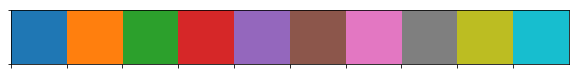

In [91]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

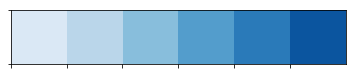

In [92]:
sns.palplot(sns.color_palette("Blues")) # more collors at https://seaborn.pydata.org/tutorial/color_palettes.html

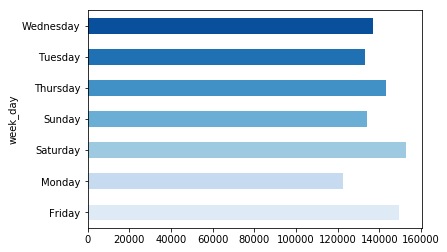

In [93]:
color_palette = sns.color_palette("Blues", 7) #The number reperesents how many colors you want
grouped1.head(10).plot(kind='barh', color = color_palette)

In [94]:
grouped1

week_day
Friday       149378
Monday       122687
Saturday     152938
Sunday       134122
Thursday     143274
Tuesday      133275
Wednesday    137027
Name: passenger_count, dtype: int64

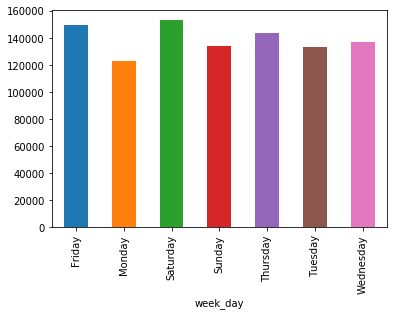

In [95]:
grouped1.plot(kind='bar')

In [96]:
week_days_dict = {'Monday' : 0, 'Tuesday' :1, 'Wednesday' : 2, 'Thursday' : 3, 'Friday' : 4, 'Saturday' : 5, 'Sunday':6 }

In [97]:
df['week_day_numbers'] = df.week_day.map(week_days_dict)
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,week_day,week_day_numbers
0,583100,id3879397,1,2016-06-02 17:46:16,2016-06-02 18:22:26,1,-73.990105,40.732841,-73.973244,40.782879,N,2170,Thursday,3
1,1320440,id0701659,1,2016-03-02 10:07:11,2016-03-02 10:20:39,1,-73.975693,40.759712,-73.988235,40.753986,N,808,Wednesday,2
2,358078,id3093367,2,2016-02-17 17:18:27,2016-02-17 18:21:34,2,-73.781830,40.644772,-73.989960,40.747150,N,3787,Wednesday,2
3,1118733,id0727316,2,2016-03-17 07:30:59,2016-03-17 07:42:18,1,-73.956200,40.778713,-73.976463,40.739731,N,679,Thursday,3
4,110409,id2137873,2,2016-04-20 17:15:26,2016-04-20 18:01:57,6,-73.789513,40.646938,-73.951851,40.809151,N,2791,Wednesday,2


In [98]:
sdf = df.sort_values(by=['week_day_numbers'])
sdf.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,week_day,week_day_numbers
389111,1322087,id0425228,2,2016-03-28 15:58:32,2016-03-28 15:58:45,1,-73.996506,40.732784,-73.996498,40.732819,N,13,Monday,0
429366,537148,id1849953,1,2016-04-18 12:20:17,2016-04-18 12:51:59,1,-73.958572,40.778084,-73.996986,40.741604,N,1902,Monday,0
53826,719644,id1385480,1,2016-06-20 21:53:12,2016-06-20 22:19:47,1,-73.985786,40.751736,-73.948814,40.747593,N,1595,Monday,0
91763,508118,id1809004,1,2016-02-29 22:59:36,2016-02-29 23:05:56,1,-74.004311,40.747677,-73.997688,40.756760,N,380,Monday,0
429362,1071235,id3369529,1,2016-06-27 10:42:51,2016-06-27 10:48:31,1,-73.953758,40.767021,-73.953796,40.779251,N,340,Monday,0


In [99]:
df.pickup_datetime.max()

Timestamp('2016-06-30 23:58:25')

In [100]:
df.pickup_datetime.min()

Timestamp('2016-01-01 00:01:14')

In [101]:
#grouped2 = df.groupby('week_day')['passenger_count'].sum()
grouped2 = df.groupby(['week_day','week_day_numbers'])['passenger_count'].sum()

In [102]:
grouped2

week_day   week_day_numbers
Friday     4                   149378
Monday     0                   122687
Saturday   5                   152938
Sunday     6                   134122
Thursday   3                   143274
Tuesday    1                   133275
Wednesday  2                   137027
Name: passenger_count, dtype: int64

In [103]:
#grouped2=grouped2.reset_index()
#grouped2=grouped2.sort_values(by=['week_day_numbers']).drop(columns='week_day_numbers')
#grouped2=grouped2.set_index('week_day')
#grouped2.plot(kind='bar')

In [104]:
grouped2=grouped2.reset_index()

In [105]:
grouped2=grouped2.sort_values(by=['week_day_numbers']).drop(columns='week_day_numbers')

In [36]:
grouped2=grouped2.set_index('week_day')

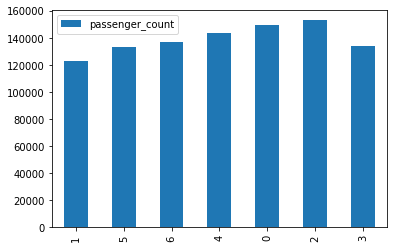

In [106]:
grouped2.plot(kind='bar')

In [38]:
#! conda install -y -c conda-forge folium

In [39]:
import folium

In [40]:
#Retrieve the Average Latitude and Longitude to Center the Map
lat = df.pickup_latitude.mean()
long = df.pickup_longitude.mean()

#Create a map of the area
cab_map = folium.Map([lat, long])
cab_map

In [70]:
#Iterate through each row of a sample of the dataframe
cab_map = folium.Map([lat, long]) #importante colocar essa formula, se nao cada vez os marcadores sao adicionados no mapa em vez de substitui-los

for row in df.sample(1).index:
    lat = df['pickup_latitude'][row]
    long = df['pickup_longitude'][row]
    marker = folium.Marker([lat, long],icon=folium.Icon(color='green'))
    marker.add_to(cab_map)
    
cab_map

In [42]:
import folium
map_1 = folium.Map(location=[45.372, -121.6972], zoom_start=12,tiles='Stamen Terrain')
folium.Marker([45.3288, -121.6625], popup='Mt. Hood Meadows', icon=folium.Icon(icon='cloud')).add_to(map_1)
folium.Marker([45.3311, -121.7113], popup='Timberline Lodge',icon=folium.Icon(color='green')).add_to(map_1)
folium.Marker([45.3300, -121.6823], popup='Some Other Location',icon=folium.Icon(color='red', icon='info-sign')).add_to(map_1)
map_1

## Linear Regression

In [43]:
#Define X and y
X = pd.get_dummies(df[['passenger_count', 'vendor_id',
           'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]) #features we think may help predict y
y = df['trip_duration'] #what we want to predict

In [44]:
X.head()

,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,vendor_id_1,vendor_id_2
0,1,-73.990105,40.732841,-73.973244,40.782879,1,0
1,1,-73.975693,40.759712,-73.988235,40.753986,1,0
2,2,-73.781830,40.644772,-73.989960,40.747150,0,1
3,1,-73.956200,40.778713,-73.976463,40.739731,0,1
4,6,-73.789513,40.646938,-73.951851,40.809151,0,1


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=32)

In [47]:
#A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

437593 145865 437593 145865


In [48]:
from sklearn.linear_model import LinearRegression

#Initialize a regression object
linreg = LinearRegression()

In [49]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [51]:
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [52]:
from sklearn.metrics import mean_squared_error

In [53]:
import numpy as np

In [54]:
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 47094372.886265345
Test Mean Squarred Error: 10795769.392378427


In [55]:
import math

In [56]:
print('Train Mean Square Rot of Squarred Error:', math.sqrt(train_mse))
print('Test Mean Square Rot of Squarred Error:', math.sqrt(test_mse))

Train Mean Square Rot of Squarred Error: 6862.533998915076
Test Mean Square Rot of Squarred Error: 3285.6916155321737


## Cross Validation

In [57]:
from sklearn.model_selection import KFold

In [58]:
kf = KFold(n_splits=6, shuffle=True)

In [59]:
for train_index, test_index in kf.split(df):
    print('train index:', train_index, len(train_index))
    print('test index:', test_index, len(test_index))
    print()

train index: [     0      2      3 ... 583455 583456 583457] 486215
test index: [     1      6      7 ... 583412 583430 583432] 97243

train index: [     1      2      3 ... 583453 583456 583457] 486215
test index: [     0      5      8 ... 583451 583454 583455] 97243

train index: [     0      1      2 ... 583455 583456 583457] 486215
test index: [     4     22     24 ... 583443 583447 583452] 97243

train index: [     0      1      3 ... 583455 583456 583457] 486215
test index: [     2     10     13 ... 583445 583446 583450] 97243

train index: [     0      1      2 ... 583453 583454 583455] 486215
test index: [     3     14     28 ... 583449 583456 583457] 97243

train index: [     0      1      2 ... 583455 583456 583457] 486215
test index: [     9     19     34 ... 583440 583448 583453] 97243



In [60]:
rmse_df = pd.DataFrame(columns=['fold', 'train', 'test'])

for fold, (train_index, test_index) in enumerate(kf.split(df)):
    X_tr = X.loc[train_index]
    y_tr = y.loc[train_index]
    X_te = X.loc[test_index]
    y_te = y.loc[test_index]
#     Similar: X_tr, y_tr, X_te, y_te = train_test_split(......)
    
#     print(X_tr.shape, y_tr.shape)
#     print(X_te.shape, y_te.shape)
#     print()
    

    mod = LinearRegression()
    mod.fit(X_tr, y_tr)
    
    rmse_tr = np.sqrt(mean_squared_error(y_tr, mod.predict(X_tr)))
    rmse_te = np.sqrt(mean_squared_error(y_te, mod.predict(X_te)))
    
    tmp_df = pd.DataFrame({'fold': [fold], 'train': [rmse_tr], 'test': [rmse_te]})
    rmse_df = pd.concat([rmse_df, tmp_df], ignore_index=True)

In [61]:
rmse_df

,fold,train,test
0,0,6593.201296,3053.683322
1,1,5962.466269,6993.753642
2,2,6580.497743,3186.976797
3,3,4205.993670,11756.745495
4,4,6573.443228,3258.223127
5,5,6590.571801,3081.793409


In [62]:
print('*Time in seconds*')
print('Mean training rmse:', rmse_df['train'].mean())
print('Mean testing rmse:', rmse_df['test'].mean())

*Time in seconds*
Mean training rmse: 6084.362334614939
Mean testing rmse: 5221.862631908297


In [64]:
from plotnine import *

C:\Users\idiesendruck\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\utils.py:281: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  ndistinct = ids.apply(len_unique, axis=0).as_matrix()
C:\Users\idiesendruck\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4388: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  object.__getattribute__(self, name)
C:\Users\idiesendruck\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:4389: FutureWarning: Attribute 'is_copy' is deprecated and will be removed in a future version.
  return object.__setattr__(self, name, value)
C:\Users\idiesendruck\AppData\Local\Continuum\anaconda3\lib\site-packages\plotnine\positions\position.py:188: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  intervals = data[xminmax].drop_duplicates().as_matrix().flatten()


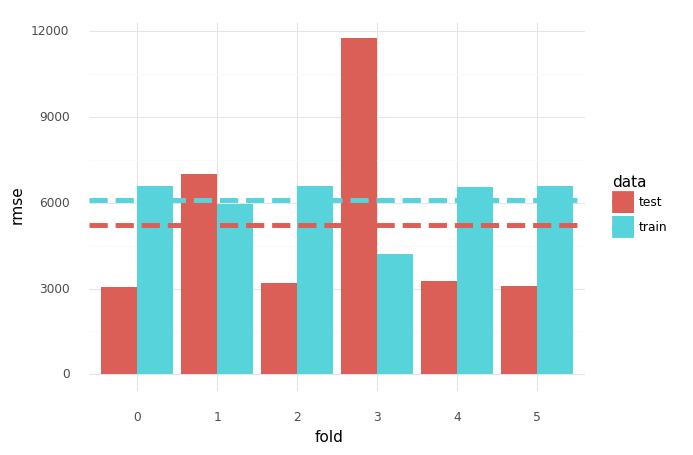

<ggplot: (147103783772)>

In [65]:
plt_df = (rmse_df.melt(id_vars=['fold'], var_name='data', value_name='rmse')
          .assign(mean = lambda d: d.groupby('data')['rmse'].transform(lambda x: x.mean()))
         )
(ggplot(plt_df, aes(x='fold', y='rmse', fill='data'))
 + geom_col(position='dodge')
 + geom_hline(aes(yintercept='mean', color='data'), linetype='--', size=2)
 + theme_minimal()
)